## Forecast Stock Future Price Using AI, Machine Learning and PyCaret

In [4]:
# !pip install pycaret

In [2]:
# Import the libraries
import pandas as pd
from pycaret.regression import *
import yfinance as yf

In [4]:
# Load the data
data = yf.download(tickers=["VOO"], start="2019-01-02", end="2022-12-31")

# Show the data
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,226.179993,230.850006,226.020004,229.990005,209.174667,4891300
2019-01-03,228.100006,228.419998,223.970001,224.500000,204.181519,3329600
2019-01-04,227.539993,232.619995,227.149994,231.910004,210.920868,5100100
2019-01-07,232.289993,235.229996,231.320007,233.649994,212.503387,3706000
2019-01-08,236.050003,236.460007,233.429993,235.919998,214.567947,3546600
...,...,...,...,...,...,...
2022-12-23,348.929993,351.950012,347.350006,351.869995,342.898804,4572000
2022-12-27,351.760010,352.040009,348.850006,350.470001,341.534485,4303200
2022-12-28,350.420013,352.200012,345.899994,346.170013,337.344116,4464600


In [6]:
# Do some feature engineering
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['DayOfWeek'] = data.index.dayofweek

In [7]:
data['NextClose'] = data['Close'].shift(-1) # define the target variable (whih is tomorrows close price)
data.dropna(inplace=True) # Drop NA values

# Show the data
data

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,DayOfWeek,NextClose
Date,,,,,,,,,,,
2019-01-02,226.179993,230.850006,226.020004,229.990005,209.174667,4891300,2019,1,2,2,224.500000
2019-01-03,228.100006,228.419998,223.970001,224.500000,204.181519,3329600,2019,1,3,3,231.910004
2019-01-04,227.539993,232.619995,227.149994,231.910004,210.920868,5100100,2019,1,4,4,233.649994
2019-01-07,232.289993,235.229996,231.320007,233.649994,212.503387,3706000,2019,1,7,0,235.919998
2019-01-08,236.050003,236.460007,233.429993,235.919998,214.567947,3546600,2019,1,8,1,237.009995
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,351.980011,352.250000,344.339996,349.910004,340.988770,6458200,2022,12,22,3,351.869995
2022-12-23,348.929993,351.950012,347.350006,351.869995,342.898804,4572000,2022,12,23,4,350.470001
2022-12-27,351.760010,352.040009,348.850006,350.470001,341.534485,4303200,2022,12,27,1,346.170013


In [8]:
# Splitting the data into training and testing sets
train = data[data.index < '2022-01-01'] # Define the training data
test = data[data.index >= '2022-01-01'] # Define the test data

In [10]:
# Initialize Pycaret regression setup
reg = setup(data = train, target='NextClose', session_id=123) # setup the environment

,Description,Value
0,Session id,123
1,Target,NextClose
2,Target type,Regression
3,Original data shape,"(757, 11)"
4,Transformed data shape,"(757, 11)"
5,Transformed train set shape,"(529, 11)"
6,Transformed test set shape,"(228, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [11]:
# Comparing models 
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,2.5547,14.5422,3.7366,0.9958,0.0130,0.0085,0.3030
ridge,Ridge Regression,2.5555,14.5311,3.7353,0.9958,0.0130,0.0085,0.0210
br,Bayesian Ridge,2.5566,14.6241,3.7443,0.9958,0.0131,0.0085,0.0320
llar,Lasso Least Angle Regression,2.5591,15.0952,3.7987,0.9956,0.0133,0.0085,0.0240
lasso,Lasso Regression,2.5975,15.6007,3.8586,0.9955,0.0135,0.0086,0.0220
en,Elastic Net,2.5902,15.4728,3.8427,0.9955,0.0134,0.0086,0.0240
gbr,Gradient Boosting Regressor,2.9734,19.3415,4.3062,0.9944,0.0153,0.0099,0.1720
et,Extra Trees Regressor,2.8978,19.6777,4.3549,0.9943,0.0155,0.0097,0.1930
rf,Random Forest Regressor,2.9108,19.6316,4.3422,0.9943,0.0154,0.0097,0.2910
lightgbm,Light Gradient Boosting Machine,3.0485,21.1929,4.5049,0.9938,0.0160,0.0102,0.1740


In [12]:
best_model

LinearRegression(n_jobs=-1)

In [13]:
# Finalize Model
finalized_model = finalize_model(best_model)

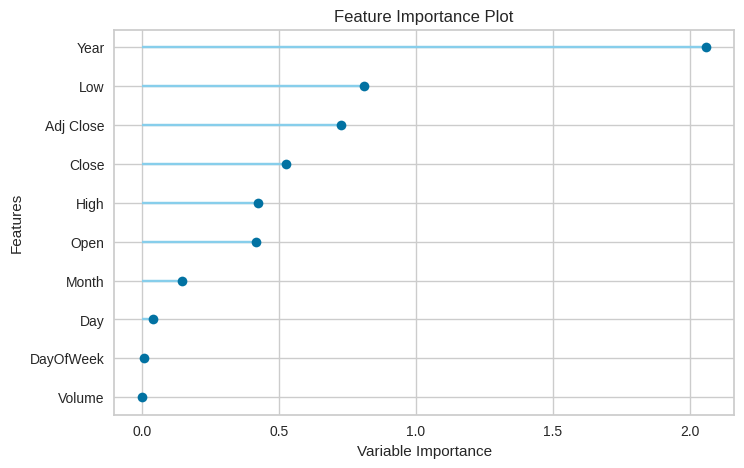

In [14]:
# Plot the feature importance 
plot_model(finalized_model, plot='feature')

In [15]:
# Show the model and the statistical evaluation metrics on the test data
predictions = predict_model(finalized_model, data=test)

# Show predictions
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,5.0723,37.9309,6.1588,0.9455,0.0165,0.0136


,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,DayOfWeek,NextClose,prediction_label
Date,,,,,,,,,,,,
2022-01-03,437.929993,439.269989,435.640015,439.250000,420.996124,6017300,2022,1,3,0,439.070007,439.062446
2022-01-04,440.579987,441.260010,437.220001,439.070007,420.823578,6262200,2022,1,4,1,430.660004,440.040952
2022-01-05,438.779999,439.410004,430.529999,430.660004,412.763062,7539600,2022,1,5,2,430.079987,433.211089
2022-01-06,430.200012,432.829987,427.899994,430.079987,412.207153,7971500,2022,1,6,3,428.589996,431.761873
2022-01-07,430.209991,431.359985,427.200012,428.589996,410.779083,6157500,2022,1,7,4,428.029999,430.138283
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,351.980011,352.250000,344.339996,349.910004,340.988770,6458200,2022,12,22,3,351.869995,350.498378
2022-12-23,348.929993,351.950012,347.350006,351.869995,342.898804,4572000,2022,12,23,4,350.470001,354.252170
2022-12-27,351.760010,352.040009,348.850006,350.470001,341.534485,4303200,2022,12,27,1,346.170013,353.890959


In [19]:
# Evaluate the model and show the predictions on the entire dataset
predictions = predict_model(finalized_model, data=data)
print(predictions[['Year', 'Month', 'Day', 'NextClose', 'prediction_label']])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,3.1071,19.4838,4.4140,0.9942,0.0140,0.0095


            Year  Month  Day   NextClose  prediction_label
Date                                                      
2019-01-02  2019      1    2  224.500000        231.056519
2019-01-03  2019      1    3  231.910004        226.672054
2019-01-04  2019      1    4  233.649994        232.368414
2019-01-07  2019      1    7  235.919998        234.874206
2019-01-08  2019      1    8  237.009995        235.808958
...          ...    ...  ...         ...               ...
2022-12-22  2022     12   22  351.869995        350.498378
2022-12-23  2022     12   23  350.470001        354.252170
2022-12-27  2022     12   27  346.170013        353.890959
2022-12-28  2022     12   28  352.309998        351.315488
2022-12-29  2022     12   29  351.339996        355.478508

[1007 rows x 5 columns]
